# This notebook goes together with Basics : Forces

In [1]:
from DAVE import *
from DAVE.jupyter import *

Equilibrium-core version = 1.05
default resource folders:
C:\Users\beneden\Miniconda3\envs\DAVE\lib\site-packages\DAVE\resources
C:\Users\beneden\DAVE_models
C:\data\Dave\Public\DAVE-notebooks\70 Book
Blender found at: C:\Program Files\Blender Foundation\Blender 2.83\blender.exe
embedWindow(verbose=True): could not load k3d module, try:
> pip install k3d      # and if necessary:
> conda install nodejs


In [2]:
s = Scene()

In [3]:
a = s.new_axis('axis_0')

In [4]:
for i in range(10):
    a = s.new_axis(f'axis_{i+1}', parent = a, position = (1,0,0))

In [5]:
p = s.new_point('point',parent=a)

In [6]:
f = s.new_force('force', parent = p)

In [7]:
f.force = (0,0,-5)

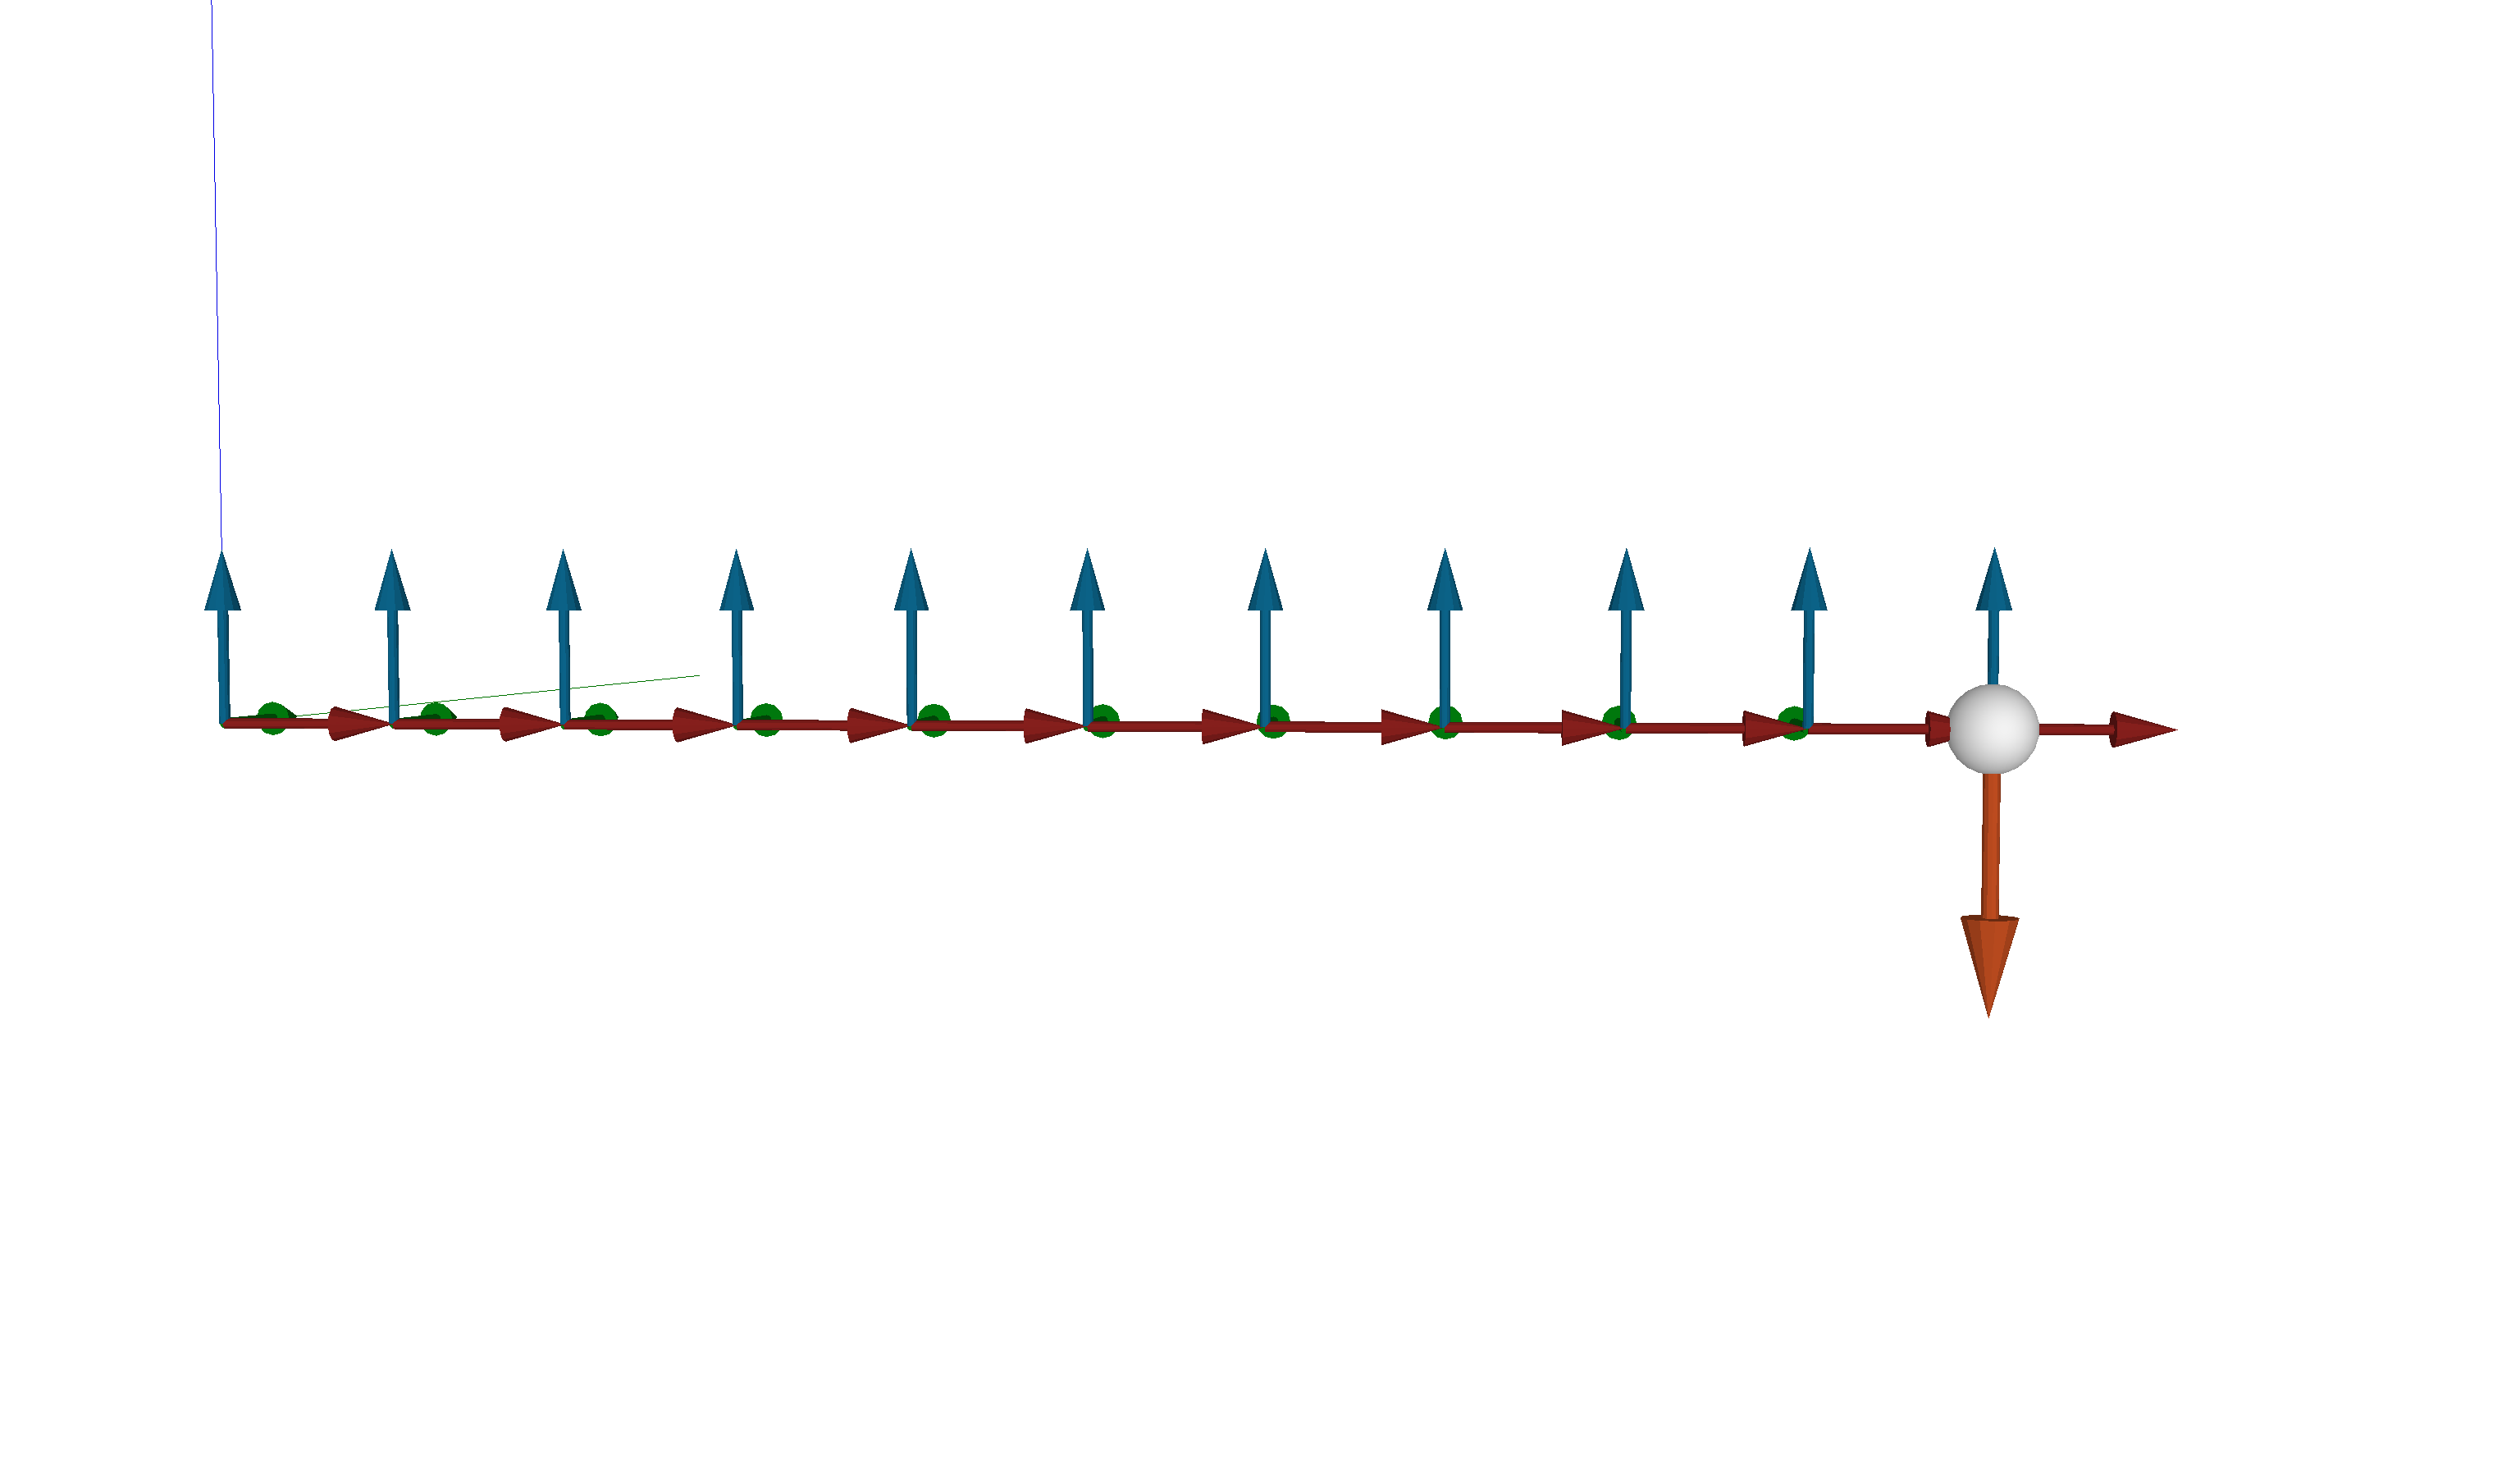

In [8]:
show(s, sea = False, camera_pos = (7.120972238813686, -15.59726683922203, 0.7170462426406728), lookat = (5.597812229842809, 5.030382818599853, -0.31770605518614115), force_normalize = True, force_scale = 1.6, cog_scale = 0.25)

In [15]:
s.print_node_tree()

axis_0 [Axis]
 |-> axis_1 [Axis]
 |    |-> axis_2 [Axis]
 |    |    |-> axis_3 [Axis]
 |    |    |    |-> axis_4 [Axis]
 |    |    |    |    |-> axis_5 [Axis]
 |    |    |    |    |    |-> axis_6 [Axis]
 |    |    |    |    |    |    |-> axis_7 [Axis]
 |    |    |    |    |    |    |    |-> axis_8 [Axis]
 |    |    |    |    |    |    |    |    |-> axis_9 [Axis]
 |    |    |    |    |    |    |    |    |    |-> axis_10 [Axis]
 |    |    |    |    |    |    |    |    |    |    |-> point [Point]
 |    |    |    |    |    |    |    |    |    |    |    |-> force [Force]


Update() calculates the forces in the model

In [9]:
s.update()

Get all the axis-type nodes from the scene.

For each of them, obtain the global positon, shear and the moment about the y-axis.

From this we can plot the moment and shear lines of the beam.

In [10]:
x = []
my = []
fz = []

for a in s.nodes_of_type(Axis):
    x.append(a.global_position[0])
    fz.append(a.applied_force[2])# python is zero based, so 0=fx, 1=fy, 2=fz, 3=mx, 4=my
    my.append(a.applied_force[4])  

And now plot them

In [11]:
import matplotlib.pyplot as plt

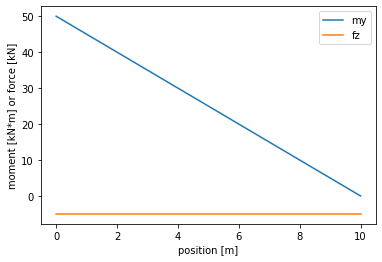

In [14]:
plt.plot(x,my, label = 'my')
plt.plot(x,fz, label = 'fz')
plt.legend()
plt.xlabel('position [m]')
plt.ylabel('moment [kN*m] or force [kN]');

---

## The equilibrium error

Release the connection of axis_6 about the Y-axis

In [17]:
s['axis_6'].fixed = (True,True,True,True,   False,   True)

Updating the model will calculate the forces the for current positions and rotations but will *not* solve statics. So an equilibrium error will be present about the released dof of axis_6

In [23]:
s.update()

In [24]:
s['axis_6'].equilibrium_error

(0.0, 0.0, 0.0, 0.0, 20.0, 0.0)

If we solve the model then the geometry will be updated such that the equilibrium errors are all zero.

In [25]:
s.solve_statics()

Solved to 0.0003710066749129659.


True

In [26]:
s['axis_6'].equilibrium_error

(0.0, 0.0, 0.0, 0.0, 0.0003710066749129659, 0.0)

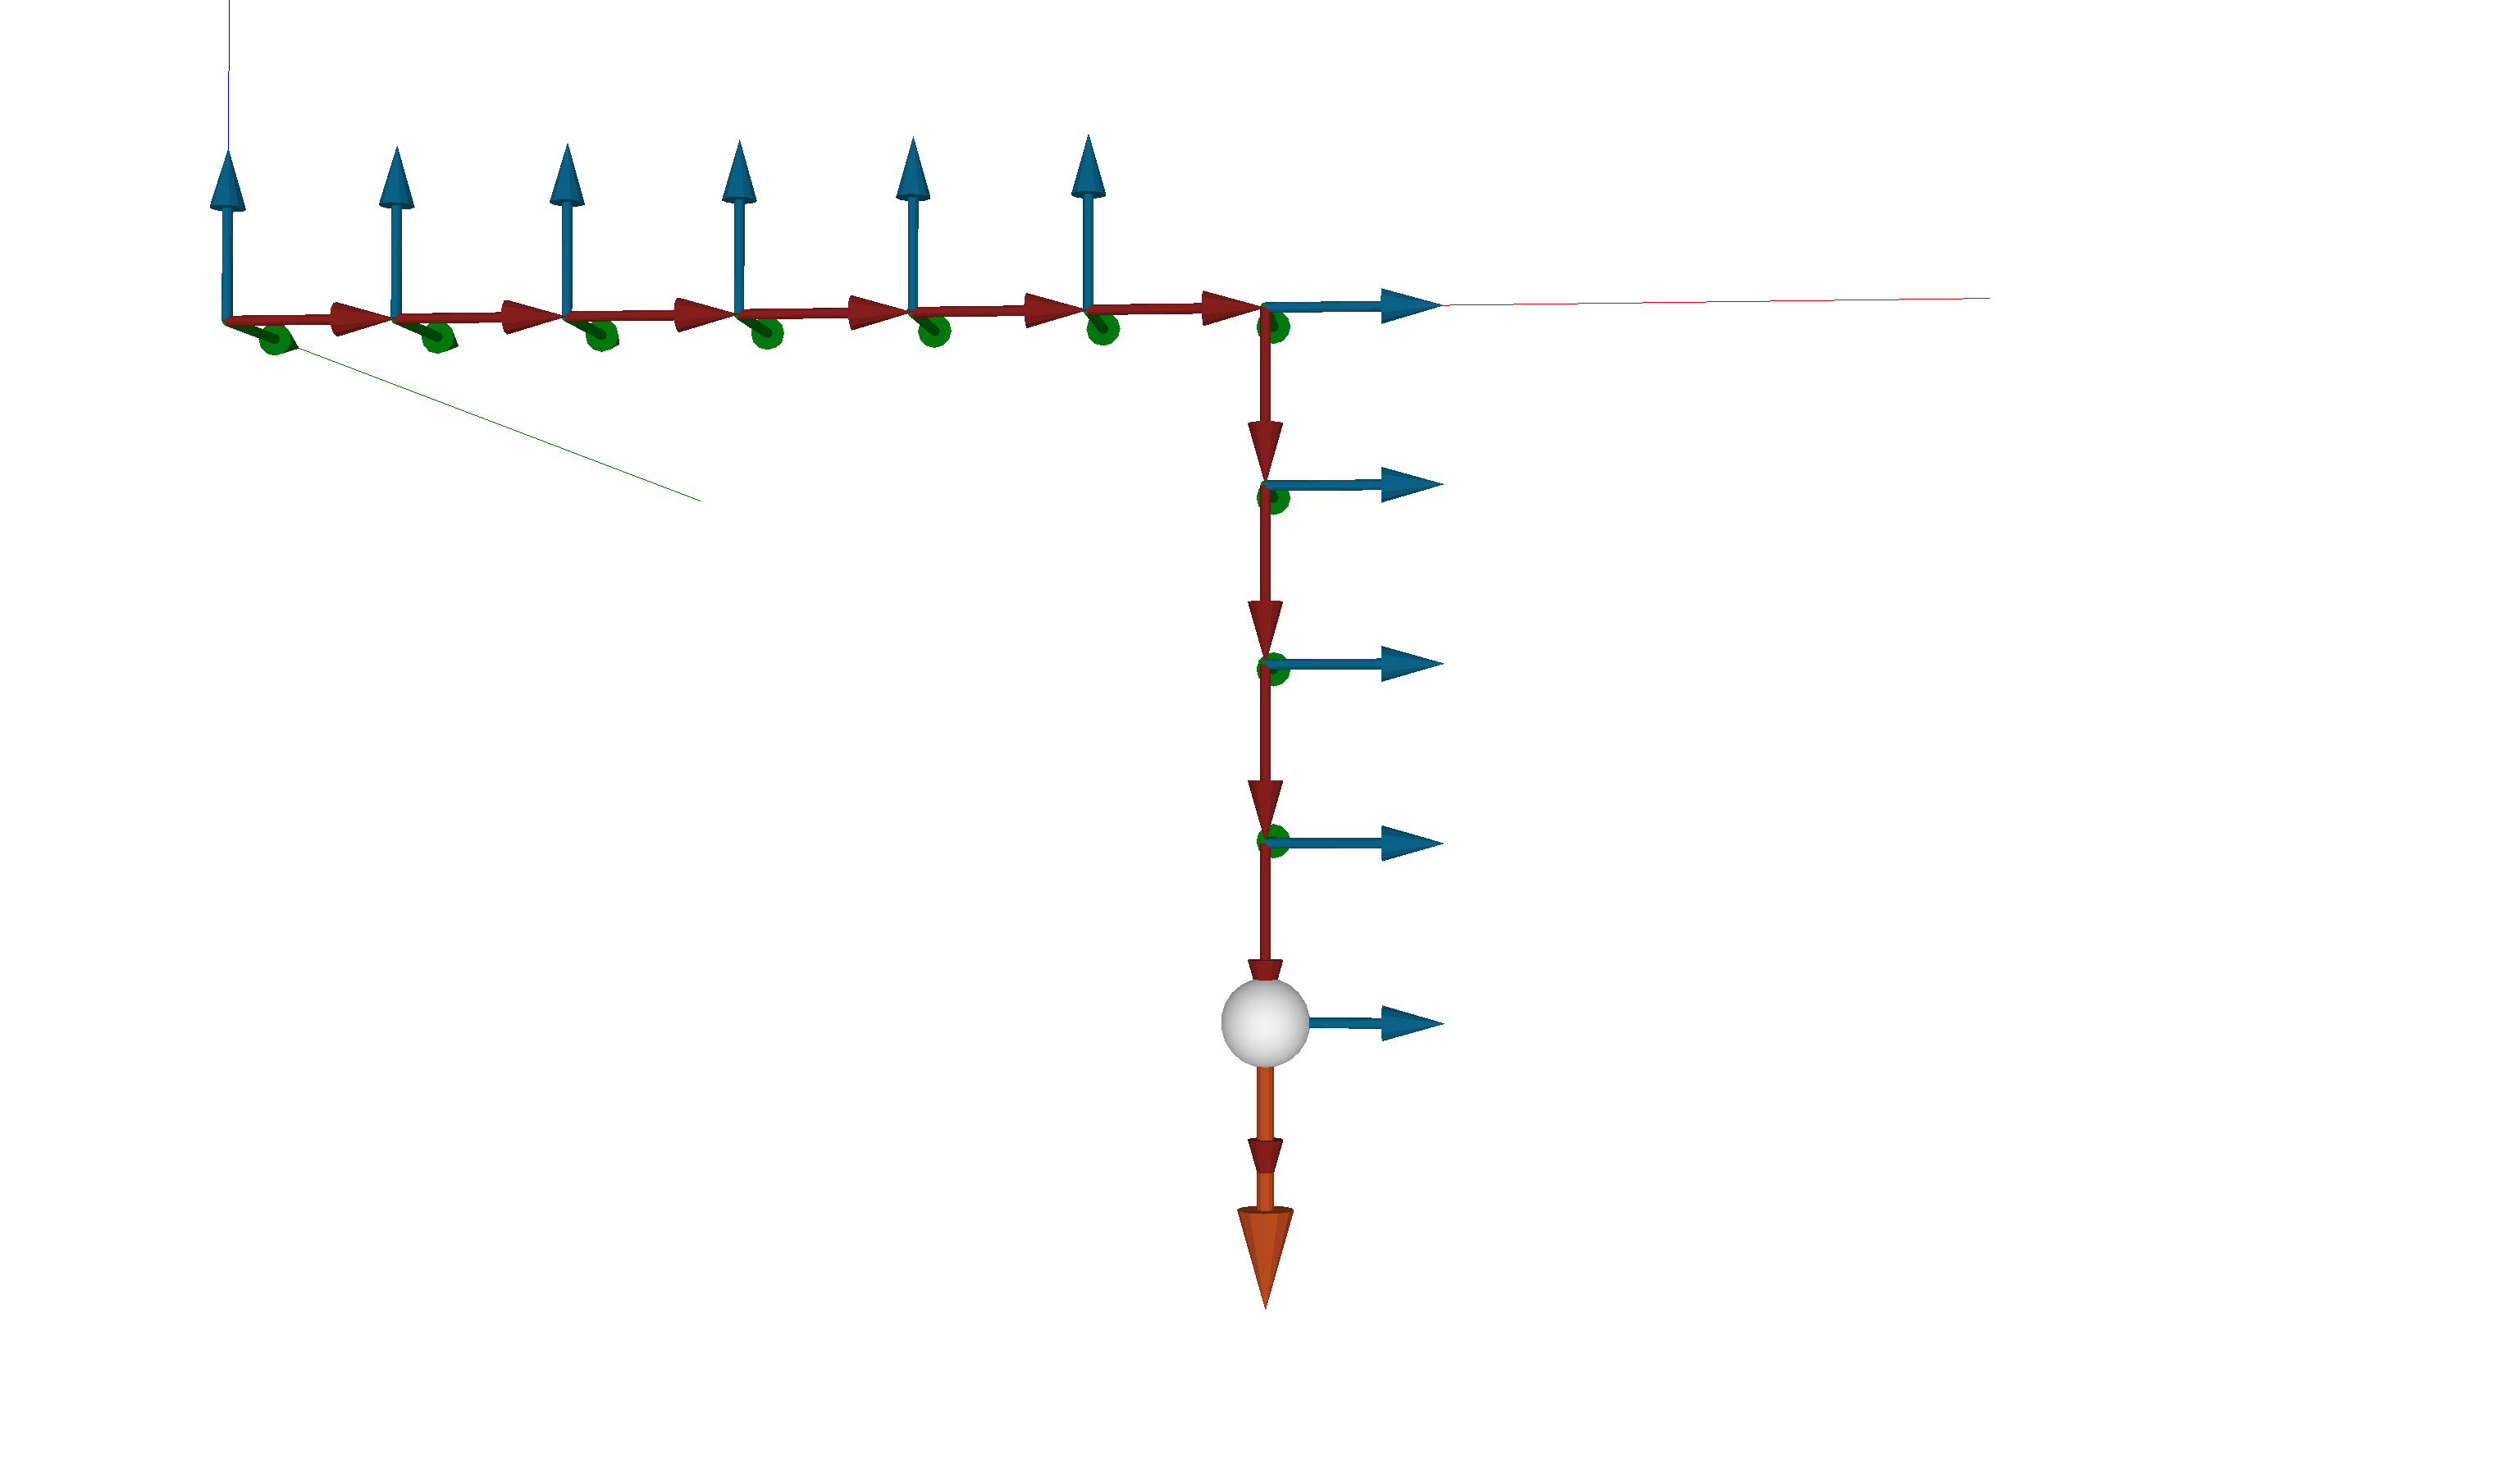

In [30]:
show(s, sea = False, camera_pos = (7.120972238813686, -15.59726683922203, -2.7170462426406728), lookat = (5.597812229842809, 5.030382818599853, -2.31770605518614115), force_normalize = True, force_scale = 1.6, cog_scale = 0.25)

---